In [37]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("../data/Hospital_Service_Area_2023.xlsx")

# Preview the first few rows
df.head()


PermissionError: [Errno 13] Permission denied: '../data/Hospital_Service_Area_2023.xlsx'

In [ ]:
# Exploratory Data Analysis
# Replace '*' with NaN and convert to numeric
cols_to_clean = ["TOTAL_DAYS_OF_CARE", "TOTAL_CHARGES", "TOTAL_CASES"]

for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col].replace("*", pd.NA), errors="coerce")

In [ ]:
# Checking Effected Rows 
df[cols_to_clean].isna().sum()

TOTAL_DAYS_OF_CARE    917773
TOTAL_CHARGES         917773
TOTAL_CASES           917773
dtype: int64

In [ ]:
df_clean = df.dropna(subset=cols_to_clean).copy()
print(f"Cleaned dataset shape: {df_clean.shape}")


Cleaned dataset shape: (130802, 5)


In [ ]:
print(df_clean.head(10))
print(df_clean.tail(10))


    MEDICARE_PROV_NUM ZIP_CD_OF_RESIDENCE  TOTAL_DAYS_OF_CARE  TOTAL_CHARGES  \
27             01S007               36467               239.0       331859.0   
106            01S011               35215               168.0       518435.0   
179            01S012               35768               267.0      1026402.0   
199            01S012               35967               260.0      1295848.0   
230            01S016               35040               292.0      1424855.0   
233            01S016               35045               122.0       674725.0   
235            01S016               35051               155.0       893415.0   
336            01S023               36108               122.0       291799.0   
339            01S023               36116               191.0       457069.0   
340            01S023               36117               126.0       287848.0   

     TOTAL_CASES  
27          17.0  
106         11.0  
179         14.0  
199         18.0  
230         14.0  
233  

In [ ]:
df_clean["avg_days_per_case"] = df_clean["TOTAL_DAYS_OF_CARE"] / df_clean["TOTAL_CASES"]
df_clean["avg_charge_per_case"] = df_clean["TOTAL_CHARGES"] / df_clean["TOTAL_CASES"]


In [ ]:
# Saving the clean dataset 
df_clean.to_csv("../outputs/hsa2023_cleaned.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


In [ ]:
! pip install matplotlib

  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\amanr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\amanr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Verifying data types of features and understanding the data 
print(df_clean[['ZIP_CD_OF_RESIDENCE', 'TOTAL_CHARGES']].sample(10))
print(df_clean['TOTAL_CHARGES'].unique())
print(df_clean.dtypes)


       ZIP_CD_OF_RESIDENCE  TOTAL_CHARGES
825184               73006       760349.0
696412               11557      3968314.0
64173                72560       865970.0
660248               07201     28089862.0
294978               33733       698069.0
374325               61870      1578929.0
539879               48895      3462097.0
648434               01951      1836491.0
359891               83549       455411.0
643672               89120       767100.0
[ 331859.  518435. 1026402. ...  753919.  659972.  533353.]
MEDICARE_PROV_NUM       object
ZIP_CD_OF_RESIDENCE     object
TOTAL_DAYS_OF_CARE     float64
TOTAL_CHARGES          float64
TOTAL_CASES            float64
avg_days_per_case      float64
avg_charge_per_case    float64
dtype: object


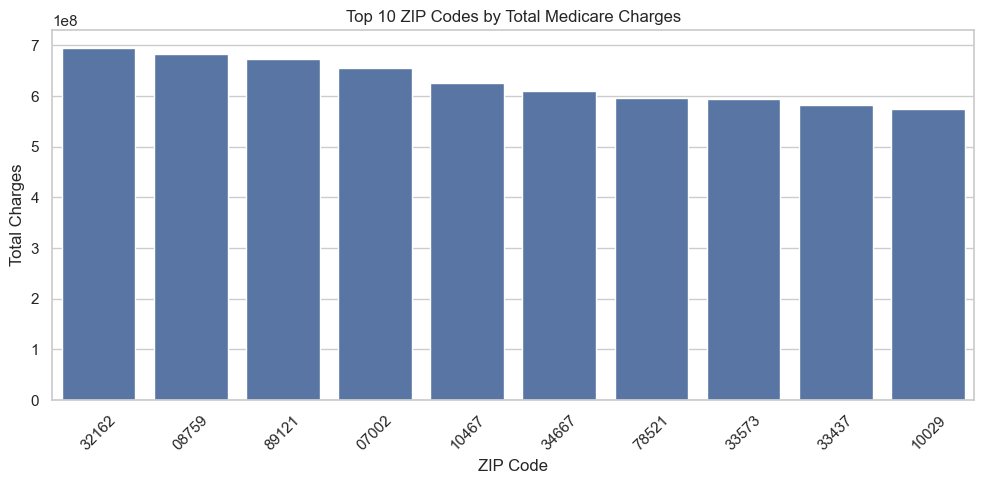

In [ ]:
#Top 10 Zip Codes by Total Medicare Charges 
top_zip_charges = df_clean.groupby("ZIP_CD_OF_RESIDENCE")["TOTAL_CHARGES"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_zip_charges.index.astype(str), y=top_zip_charges.values)
plt.title("Top 10 ZIP Codes by Total Medicare Charges")
plt.xlabel("ZIP Code")
plt.ylabel("Total Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


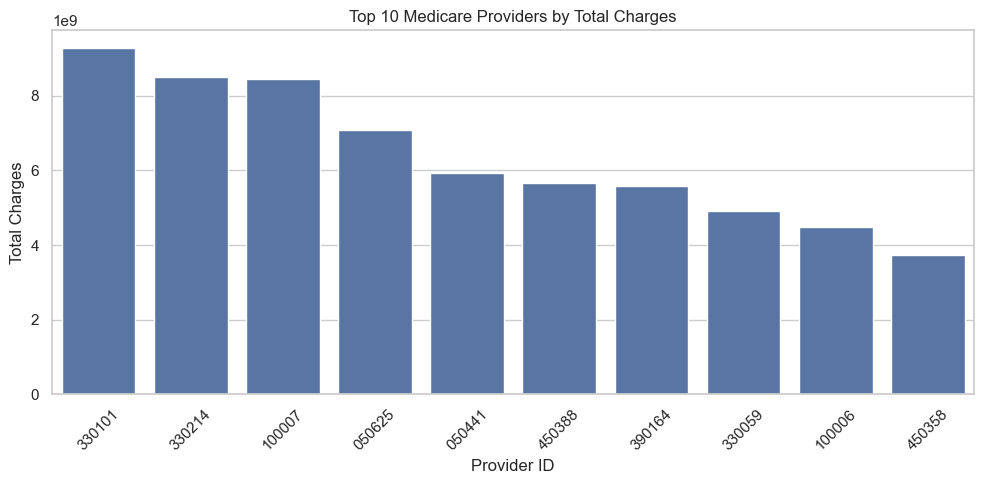

In [ ]:
top_providers = df_clean.groupby("MEDICARE_PROV_NUM")["TOTAL_CHARGES"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_providers.index.astype(str), y=top_providers.values)
plt.title("Top 10 Medicare Providers by Total Charges")
plt.xlabel("Provider ID")
plt.ylabel("Total Charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
df_clean["avg_charge_per_case"]

27          19521.117647
106         47130.454545
179         73314.428571
199         71991.555556
230        101775.357143
               ...      
1048451     28703.615385
1048454     62684.000000
1048455     68538.090909
1048456     54997.666667
1048480     35556.866667
Name: avg_charge_per_case, Length: 130802, dtype: float64

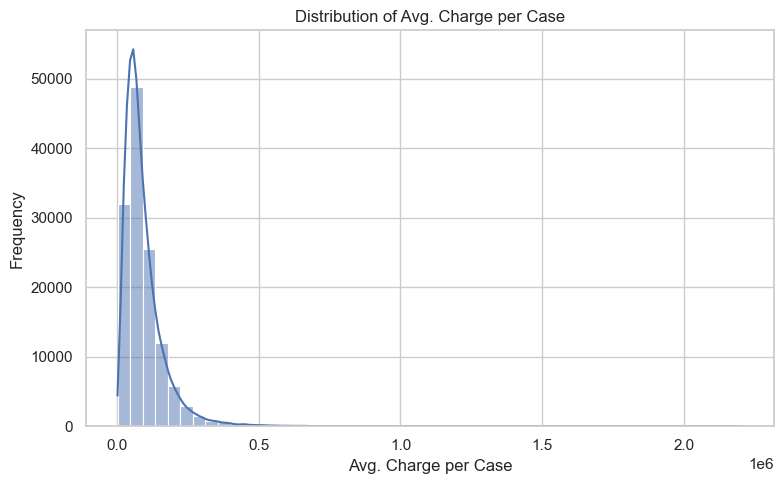

In [31]:
#Average Charges per case
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["avg_charge_per_case"], bins=50, kde=True)
plt.title("Distribution of Avg. Charge per Case")
plt.xlabel("Avg. Charge per Case")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


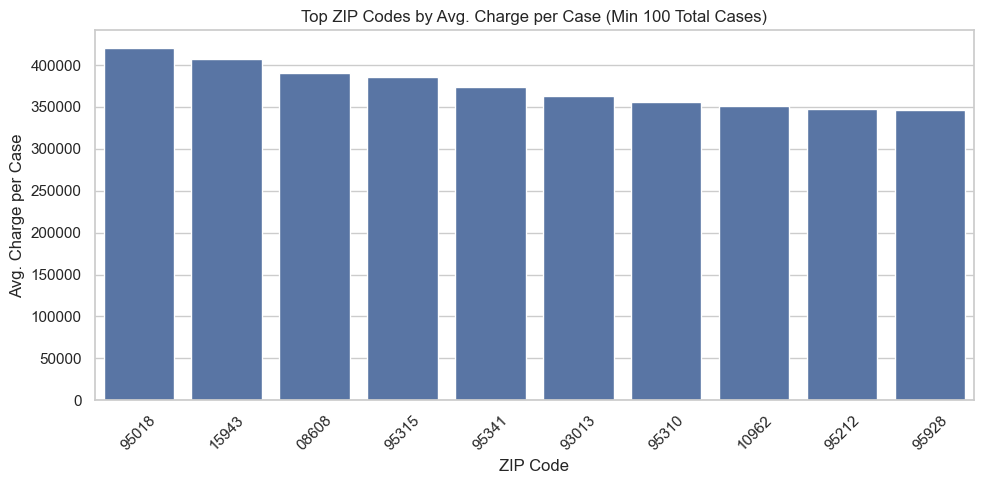

In [33]:
#ZIPs with Highest Avg. Charge per Case (Filter to >100 Cases)
high_volume_zip = df_clean.groupby("ZIP_CD_OF_RESIDENCE").filter(lambda x: x["TOTAL_CASES"].sum() > 100)

avg_charge_by_zip = high_volume_zip.groupby("ZIP_CD_OF_RESIDENCE")["avg_charge_per_case"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_charge_by_zip.index.astype(str), y=avg_charge_by_zip.values)
plt.title("Top ZIP Codes by Avg. Charge per Case (Min 100 Total Cases)")
plt.xlabel("ZIP Code")
plt.ylabel("Avg. Charge per Case")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
